In [11]:
import pandas as pd
from pathlib import Path
import logging

import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare github search results

In [38]:
data_directory = Path(r'../data/')
extracted_data_directory = data_directory / 'extracted/'

data = {filename:pd.read_csv(filename) for filename in extracted_data_directory.glob('github_results_query*.csv')}
manually_added = pd.read_csv(extracted_data_directory / 'manually_added.csv')

## Displaying the numer of items returned by topics

In [39]:
nb_items = pd.Series({str(k.stem)[21:]:v.shape[0] for k,v in data.items()})
nb_items.sort_values(ascending=True, inplace=True)

In [40]:
nb_items

time-series-decomposition      0
time-series-forecast           0
time-series-visualization      0
time-series-clustering         1
time-series-data-mining        1
time-series-segmentation       1
time-series-prediction         2
timeseries-forecasting         2
time-series-regression         3
timeseries-analysis            5
time-series-classification     7
time-series-forecasting        7
time-series-analysis          17
timeseries                    22
signal-processing             25
time-series                   60
dtype: int64

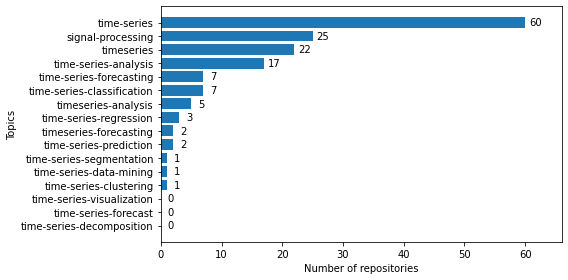

In [41]:

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.barh(nb_items.index, nb_items.values)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Topics')
ax.set_xlabel('Number of repositories')
# ax.set_title('Number of repositories per topic')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, -5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
ax.set_xlim(0,nb_items.max() * 1.1)
fig.tight_layout()

#plt.savefig('../latex/images/nb-items-per-topics.pdf')

## Merging all data

In [42]:
dataframe = pd.concat(data.values(), axis=0)

In [43]:
dataframe = pd.concat([
    dataframe, manually_added
], axis=0)

In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 19
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 173 non-null    float64
 1   node_id            173 non-null    object 
 2   name               173 non-null    object 
 3   full_name          173 non-null    object 
 4   private            173 non-null    object 
 5   owner              173 non-null    object 
 6   html_url           173 non-null    object 
 7   description        173 non-null    object 
 8   fork               173 non-null    object 
 9   url                173 non-null    object 
 10  forks_url          173 non-null    object 
 11  keys_url           173 non-null    object 
 12  collaborators_url  173 non-null    object 
 13  teams_url          173 non-null    object 
 14  hooks_url          173 non-null    object 
 15  issue_events_url   173 non-null    object 
 16  events_url         173 non-

## Find and remove duplicates

In [45]:
duplicates = dataframe[dataframe.duplicated(keep='first')].sort_values(by='name')

In [46]:
print(f'found {len(duplicates.full_name.unique())} duplicated unique repositories')
print(
    '. '.join([f'\href[{vals[0]}][{vals[1]}]' for i, vals in duplicates[['html_url', 'name']].drop_duplicates().iterrows()])
)

found 28 duplicated unique repositories
\href[https://github.com/KDD-OpenSource/DeepADoTS][DeepADoTS]. \href[https://github.com/fjxmlzn/DoppelGANger][DoppelGANger]. \href[https://github.com/hfawaz/InceptionTime][InceptionTime]. \href[https://github.com/laszukdawid/PyEMD][PyEMD]. \href[https://github.com/gaborvecsei/Stocks-Pattern-Analyzer][Stocks-Pattern-Analyzer]. \href[https://github.com/shubhomoydas/ad_examples][ad_examples]. \href[https://github.com/firmai/atspy][atspy]. \href[https://github.com/exoplanet-dev/exoplanet][exoplanet]. \href[https://github.com/AIStream-Peelout/flow-forecast][flow-forecast]. \href[https://github.com/awslabs/gluon-ts][gluon-ts]. \href[https://github.com/heidelbergcement/hcrystalball][hcrystalball]. \href[https://github.com/lightkurve/lightkurve][lightkurve]. \href[https://github.com/regel/loudml][loudml]. \href[https://github.com/matrix-profile-foundation/matrixprofile][matrixprofile]. \href[https://github.com/ourownstory/neural_prophet][neural_prophet].

In [47]:
length_before_drop = len(dataframe)
dataframe = dataframe.drop_duplicates(subset='name')
print(f'dropping {length_before_drop - len(dataframe)} rows')

dropping 44 rows


In [48]:
# sanity check
assert len(dataframe.name.unique()) == len(dataframe), 'still have duplicates!'

In [49]:
dataframe.shape

(129, 80)

## Saving preprocessed results

In [50]:
dataframe.to_csv(data_directory / 'preprocessed' / 'github_results.csv', index=True)